In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
import seaborn as sns
import stumpy
import peakutils

In [79]:
window = 30

In [80]:
motifs = pd.read_hdf(f"correct_frame_motifs_{window}_nclusters_15_meanvarnorm_rollingmean.hdf5", key = "data")

In [52]:
df = pd.read_pickle("/data/longterm/10/athira/July17_features_combined_noLightStimuli.pickle")

In [81]:
palette = sns.color_palette("tab20", n_colors=15)

In [82]:
def get_curvature_data(f):
    """
    function to extract a specific timeseries from the main dataframe.
    """
    df_f = df[df["filename"] == f]
    cols_to_return = [c for c in df.columns if "curv" in c]
    return df_f[cols_to_return]

In [83]:
traces = np.random.choice(df.filename, 25)

In [84]:
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)]

In [85]:
plt.close("all")

In [86]:
def do_work(filename, window = 150):
    try:
        data = get_curvature_data(filename)
        for c in data.columns:
            data[c] = data[c].rolling(10).mean()
        data = data[10:]
        mp, ind = stumpy.mstump(data, m = window)
        peaks = peakutils.indexes(1-mp[:,-1], min_dist = window, thres = 0.8)
        motifs = np.stack([data.values[peak:peak+window, :] for peak in peaks])
        df = pd.DataFrame(zip(mp, peaks), columns = ["motifs", "motif_start"])
        df["filename"] = filename
    
        return df, data, mp, peaks
    except Exception as e:
        return( (filename, str(e)))

In [87]:
def plot_motifs(curvs, peaks, mp, window = 150):
    fig, axes = plt.subplots(8,1, figsize = (10,6), sharex=True)
    for i, ax in enumerate(axes):
        try:
            ax.plot(curvs[:,i], lw = 0.5)
        except:
            pass
    axes[-1].plot(mp[:,-1], lw = 0.5)
    axes[-1].scatter(peaks, mp[peaks,-1], c = "r", s = 1)
    axes[-1].set_ylabel("MP")
    axes[-1].set_xlabel("Time (frames)")
    axes[-1].set_yticks([])
    for peak in peaks:
        for i in range(7):
            axes[i].plot(np.arange(peak, peak+window), curvs[peak:peak+window, i])
            axes[i].set_ylabel(f"Curv {i}")
            axes[i].set_yticks([])
    return fig
    

In [42]:
do_work(traces[0])

('20180926_105410_1_5m0s_Dopamine_None_None_INVERTED_skeletons.hdf5',
 'need at least one array to stack')

In [58]:
data = get_curvature_data(traces[1])
data = data[10:]
mp, ind = stumpy.mstump(data, m = window)
peaks = peakutils.indexes(1-mp.T[:,-1], min_dist = window, thres = 0.5)
# motifs = np.stack([data.values[peak:peak+window, :] for peak in peaks])
# df = pd.DataFrame(zip(mp, peaks), columns = ["motifs", "motif_start"])
# df["filename"] = filename


In [73]:
palette = sns.color_palette("colorblind", n_colors=15)

<ipython-input-88-2114ca8f1827>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(8,1, figsize = (12,8), constrained_layout = True, sharex = True)


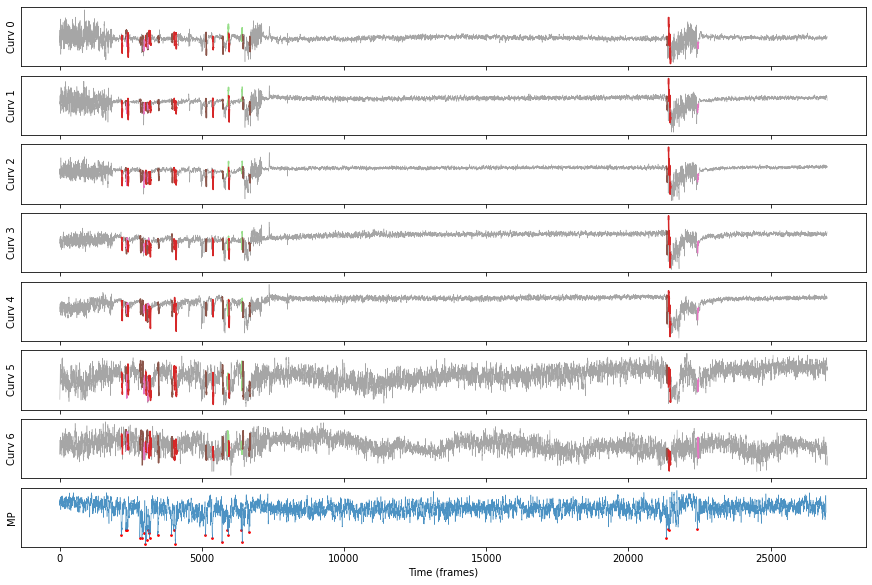

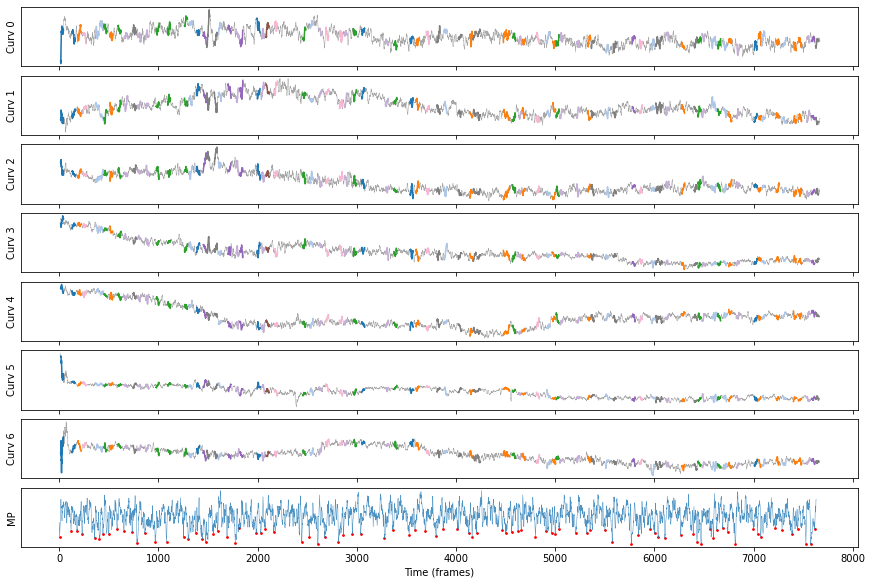

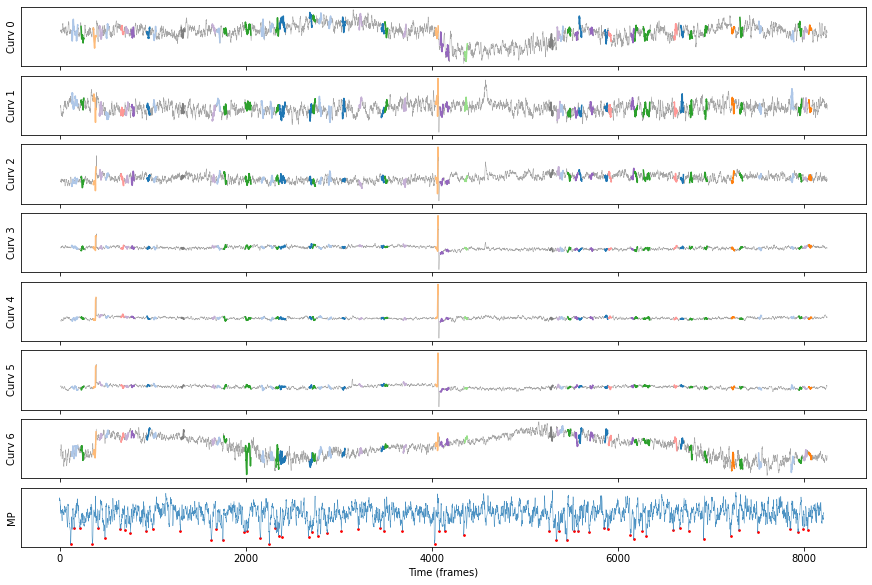

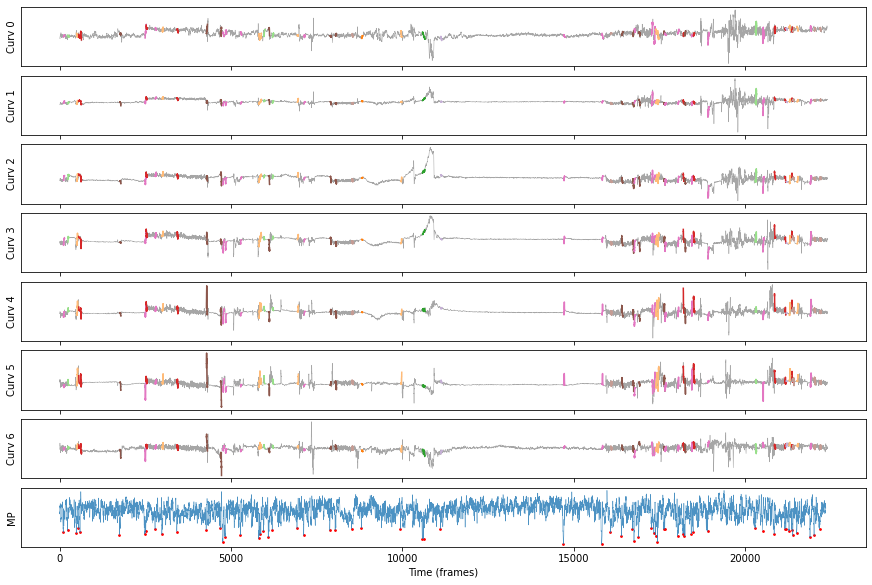

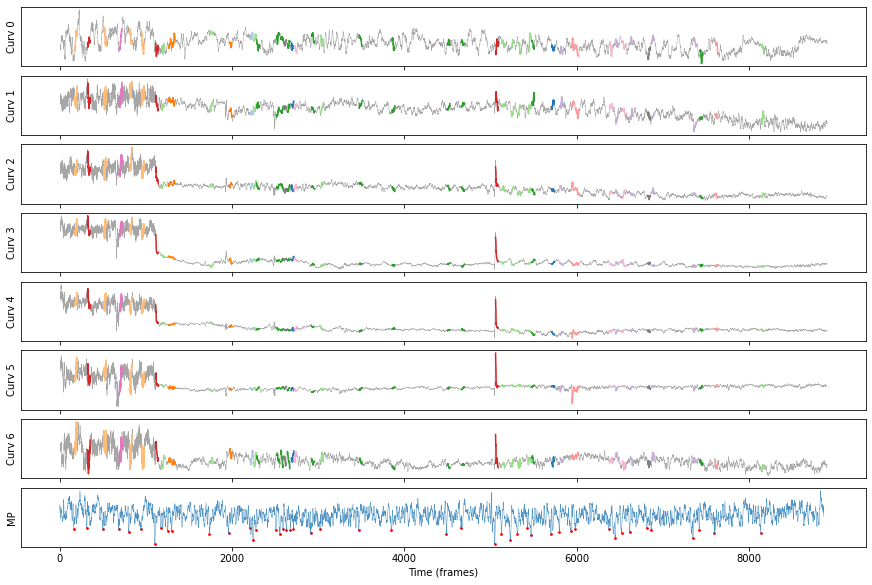

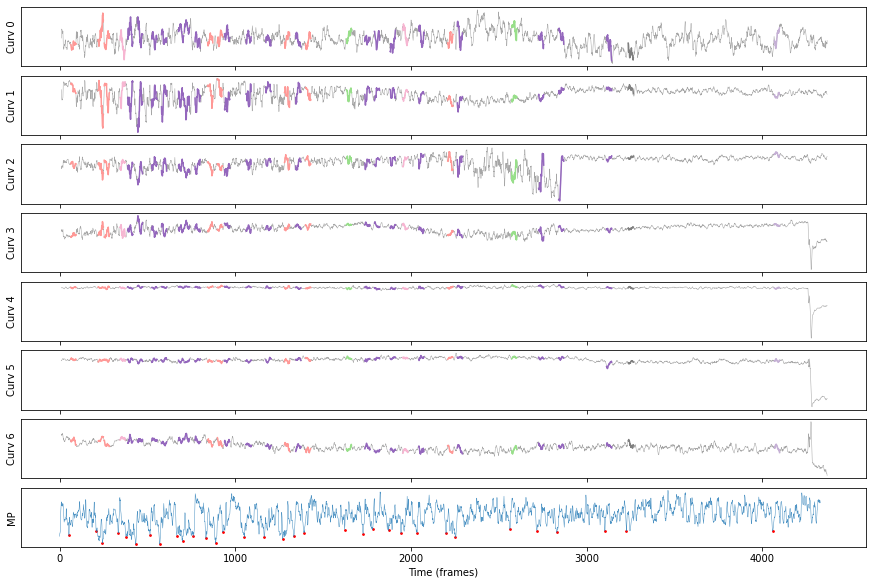

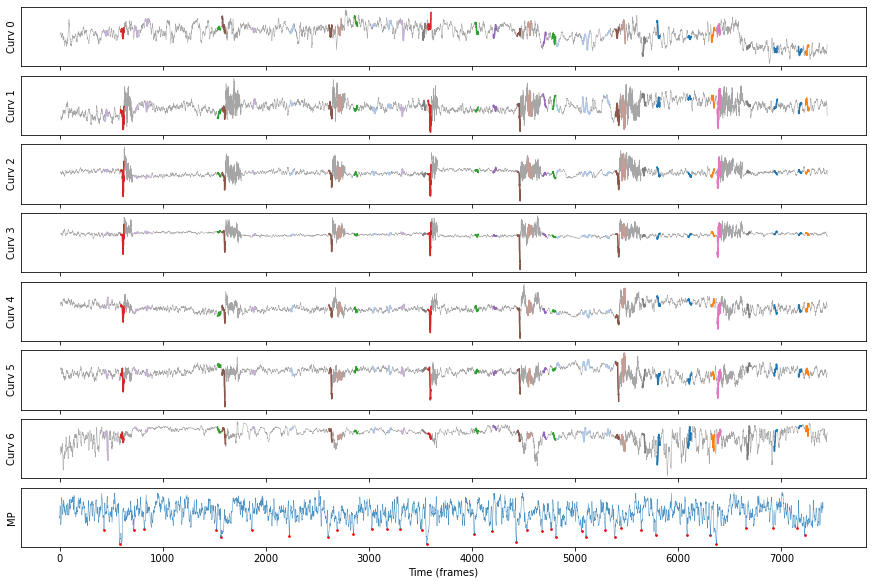

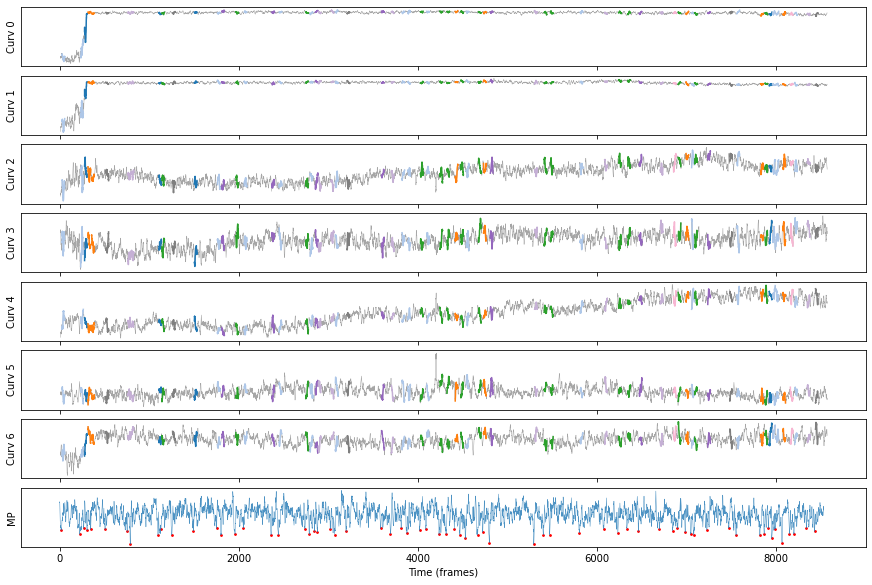

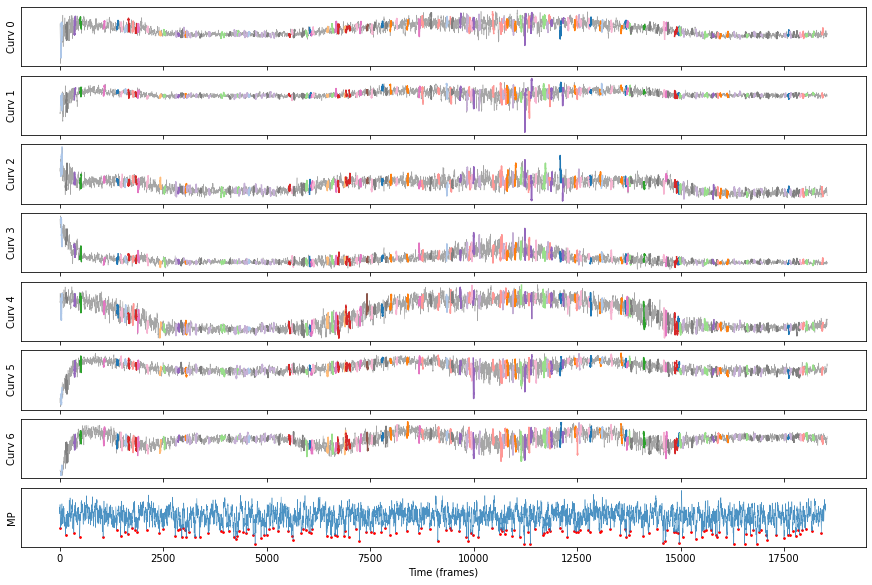

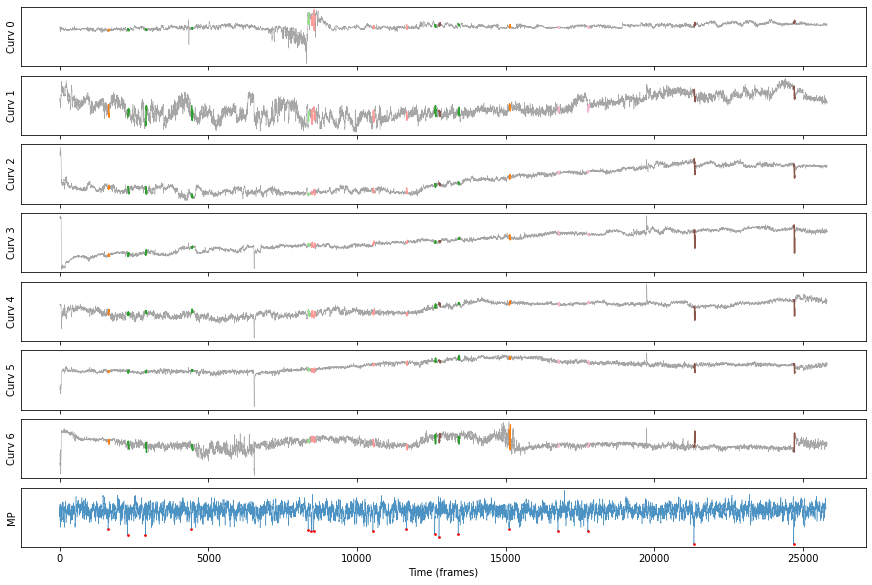

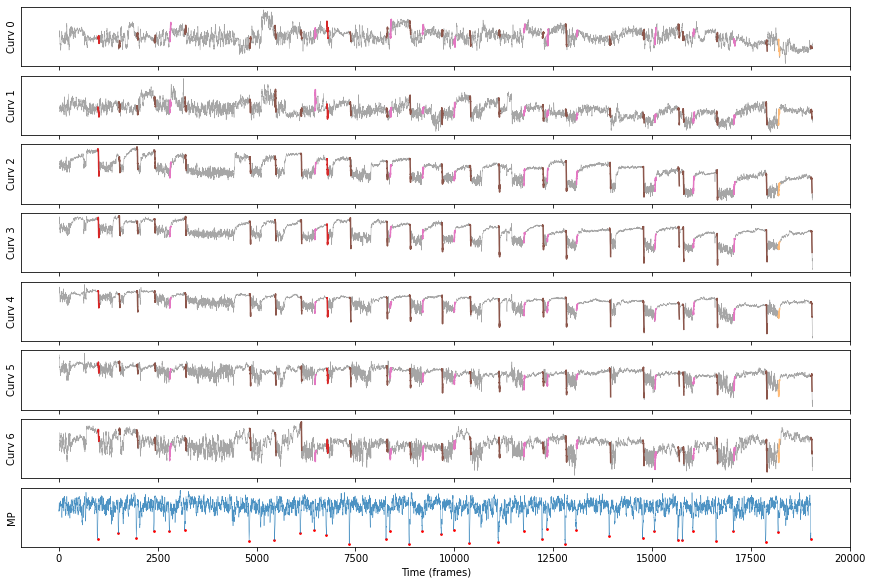

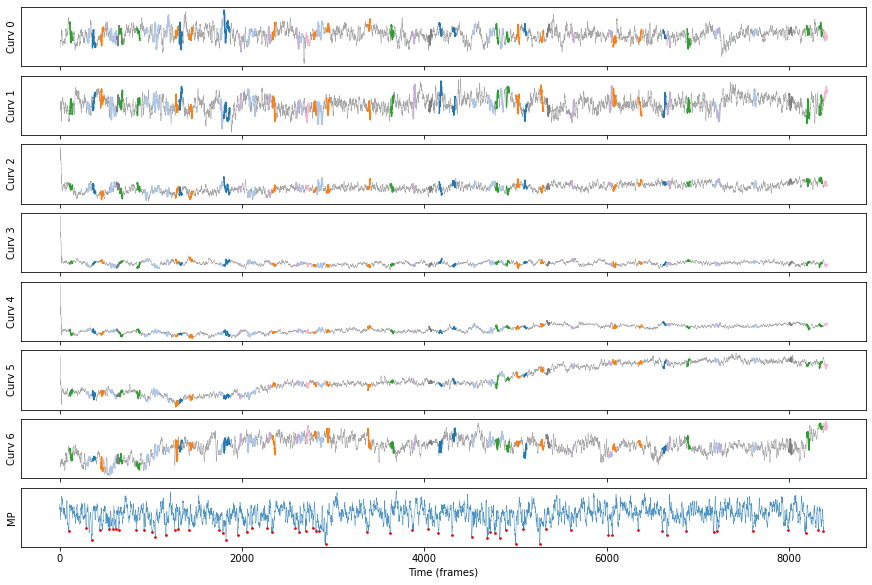

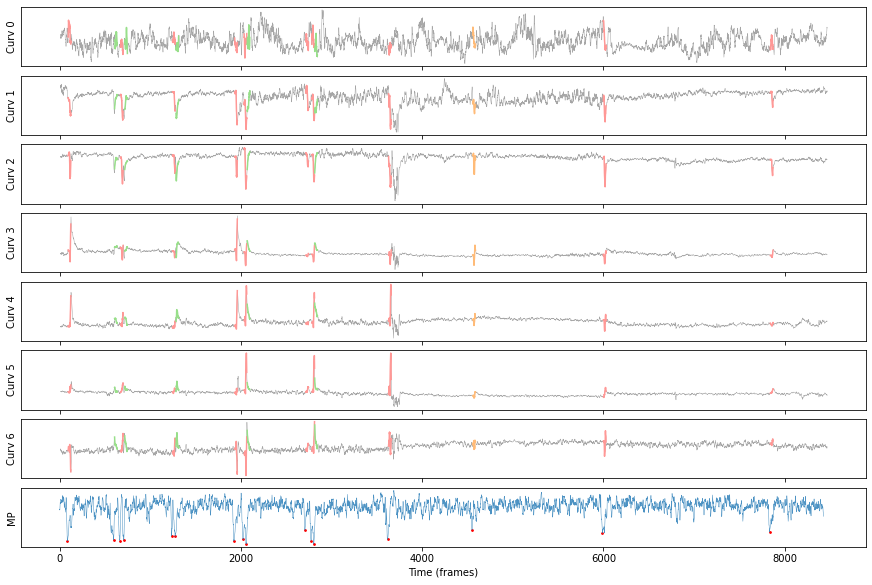

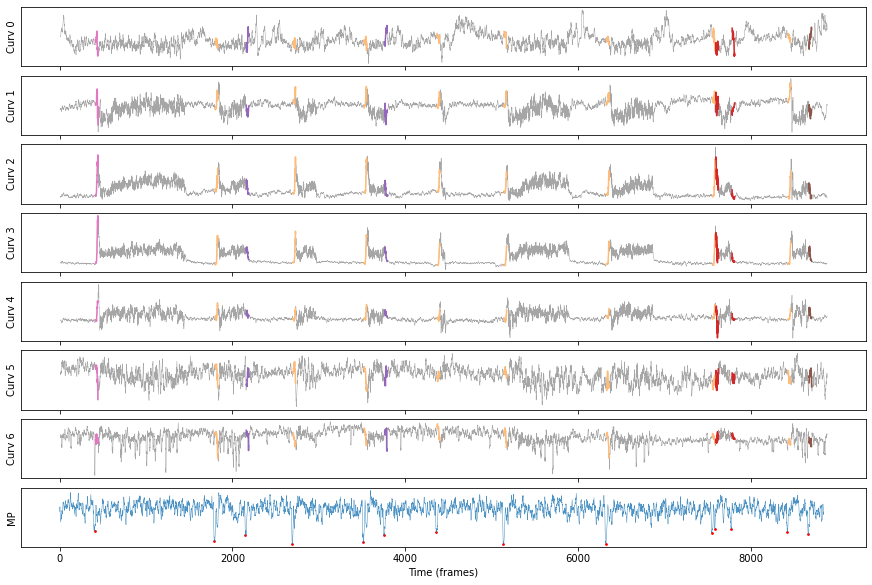

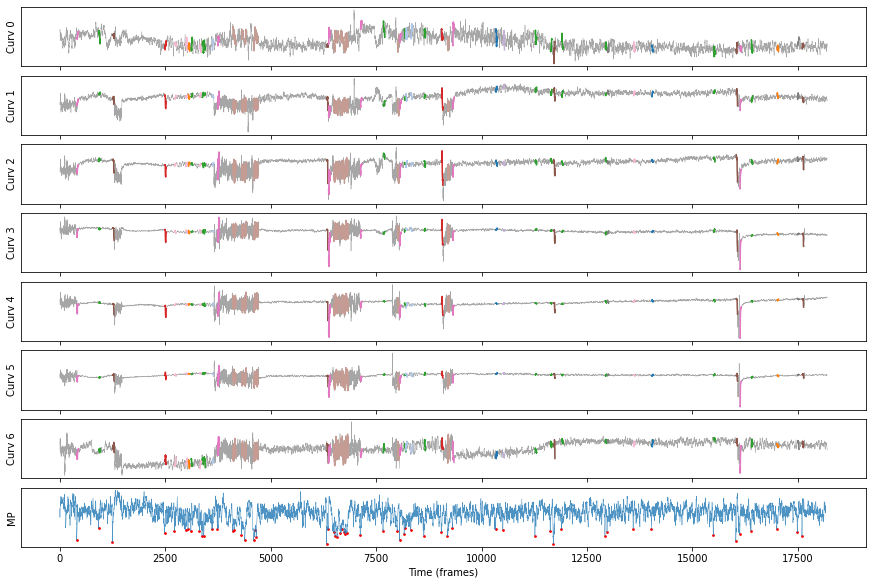

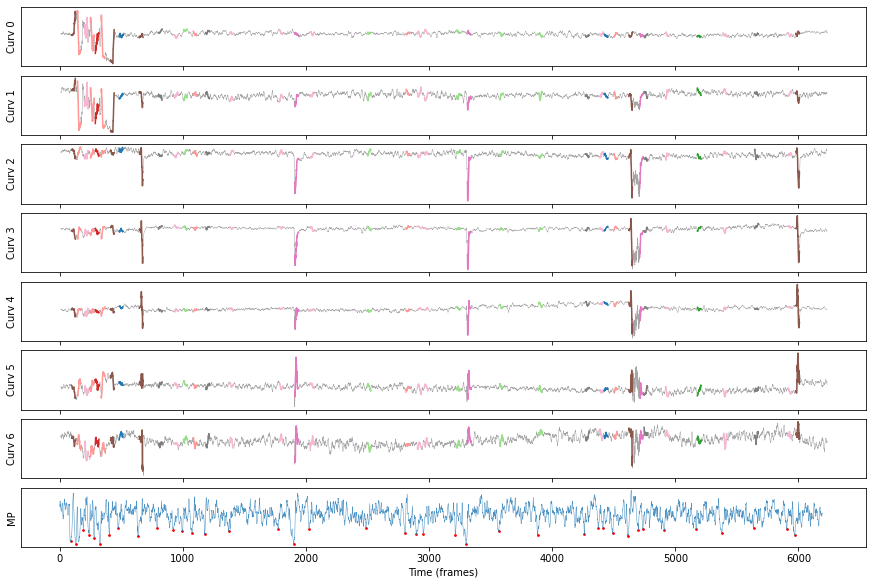

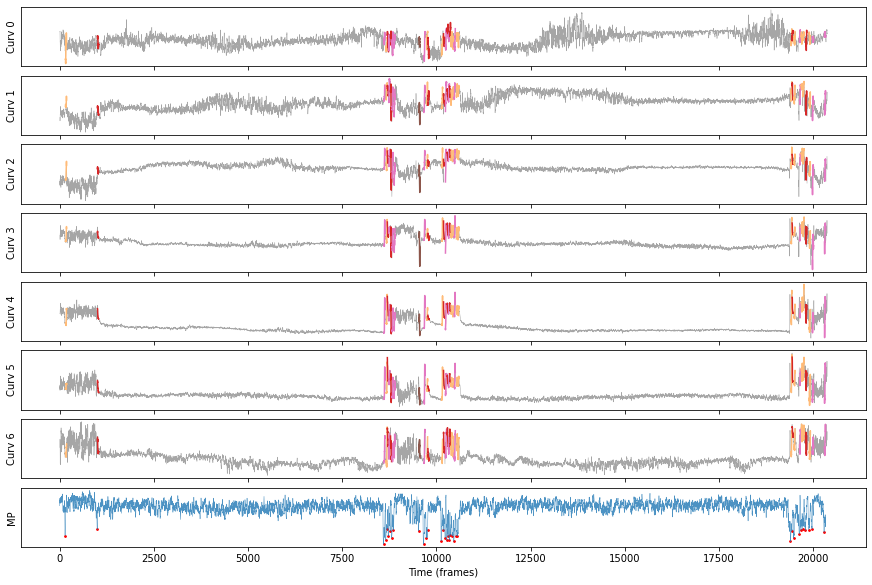

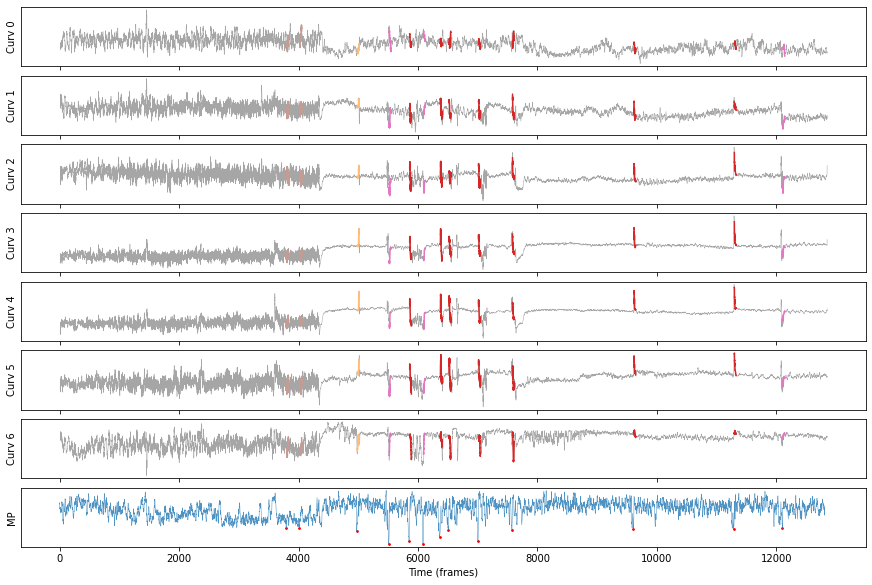

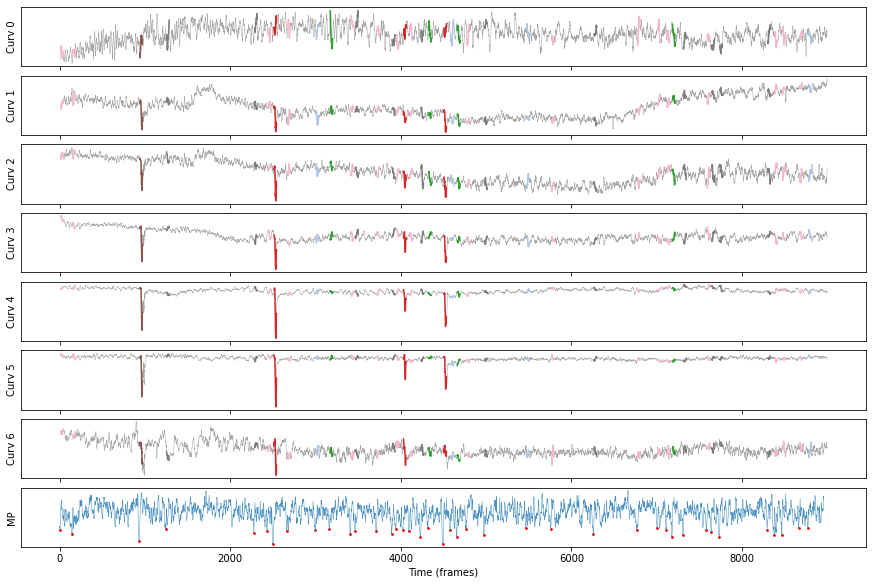

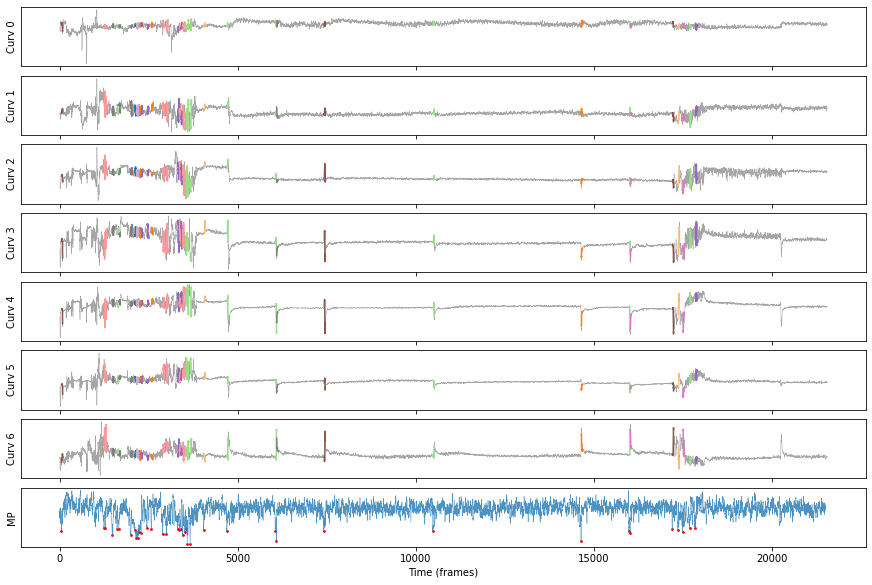

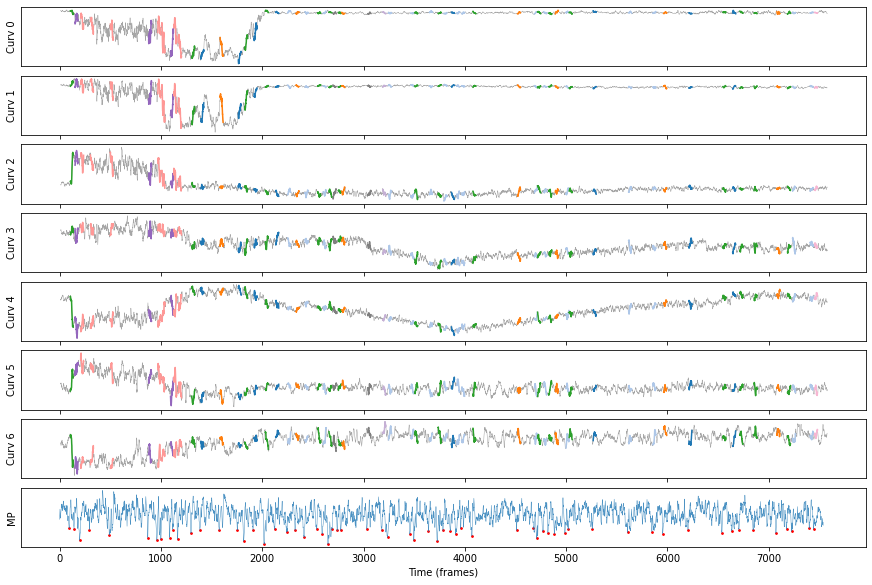

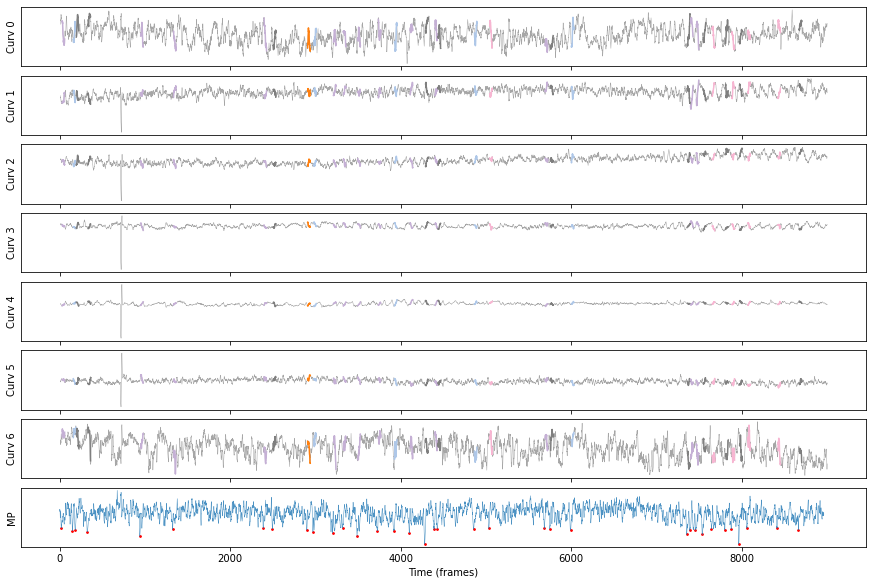

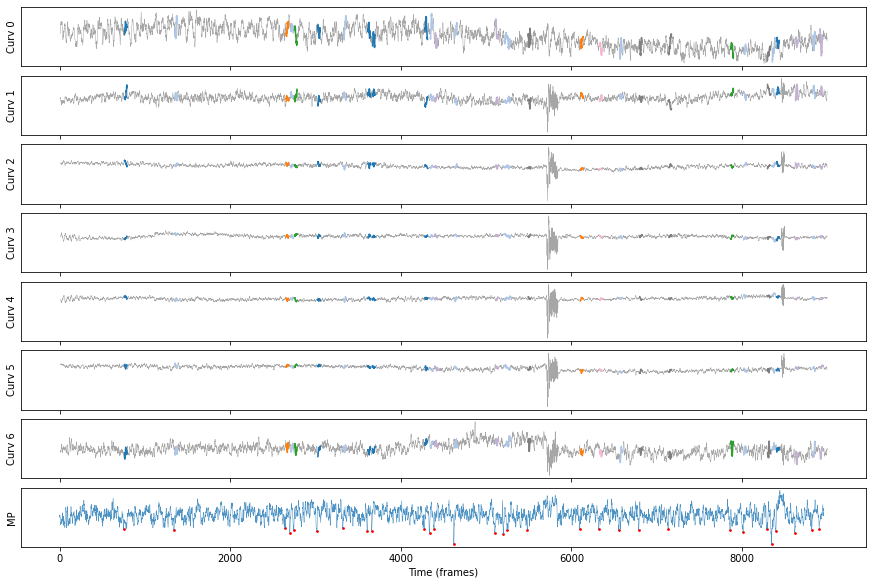

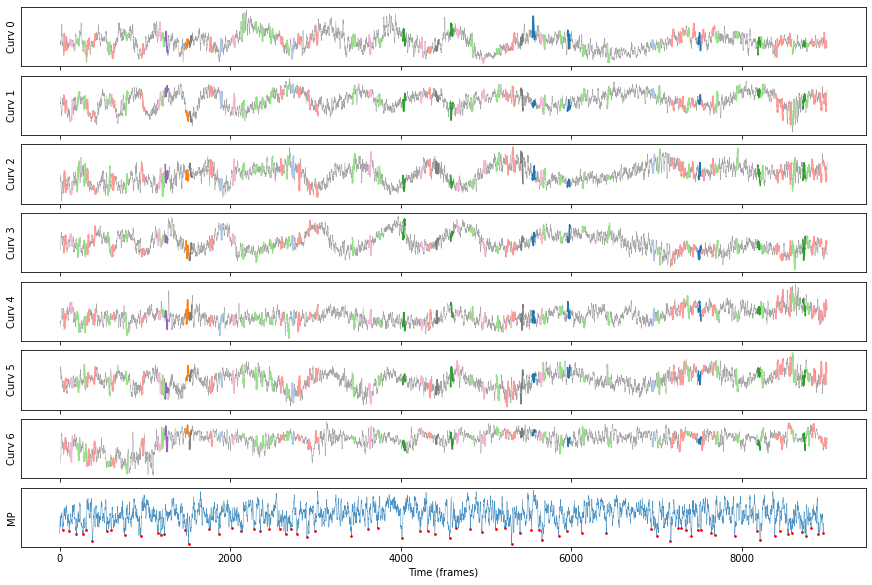

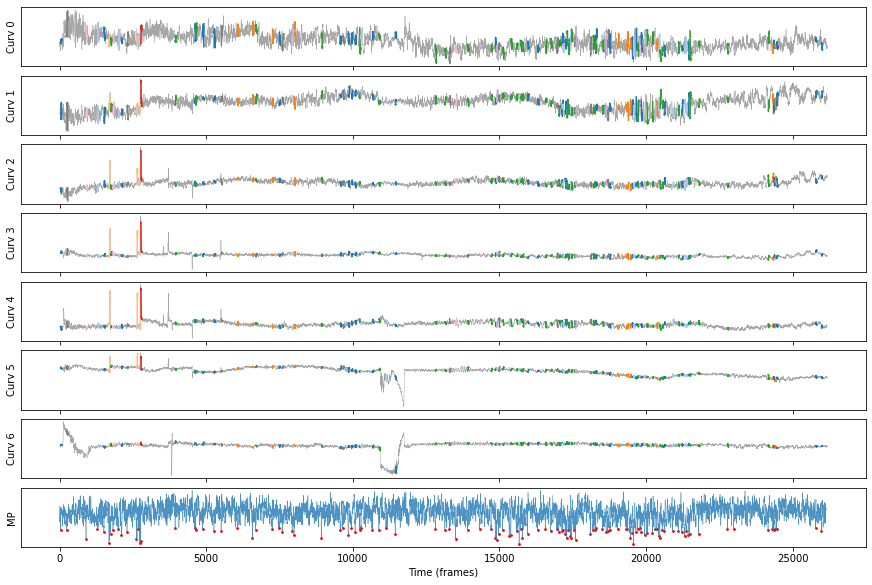

In [88]:
for n, f in enumerate(traces):
    
    data = get_curvature_data(f)
    for c in data.columns:
        data[c] = data[c].rolling(10).mean()
    data = data[10:]
    mp, ind = stumpy.mstump(data, m = window)
    peaks = peakutils.indexes(1-mp[:,-1], min_dist = window, thres = 0.8)
    
    motif_selection = motifs[motifs["filename"] == f]
    fig, axes = plt.subplots(8,1, figsize = (12,8), constrained_layout = True, sharex = True)
    for i, curve in enumerate(data):
        axes[i].plot(data[curve], lw = 0.5, alpha = 0.7, c = "gray")
        for m in motif_selection.index:
            frame = motif_selection["frame"][m]
            label = motif_selection["labels_dtw"][m]
            axes[i].plot(data[curve][frame:frame+window], c = palette[label-1])
            axes[i].set_ylabel(f"Curv {i}")
            axes[i].set_yticks([])
    axes[7].plot(mp[-1], lw = 0.5, alpha = 0.8)
    for frame in motif_selection["frame"]:
        axes[7].scatter(frame, mp[-1][frame], c = "r", s = 3)
    axes[-1].set_ylabel("MP")
    axes[-1].set_xlabel("Time (frames)")
    axes[-1].set_yticks([])
    
    fig.savefig(f"trace_coloured_motif_{window}_{n}.svg")
    
    

In [65]:
mp

array([[ 8.04663417,  8.00903989,  8.00262997, ...,  7.79370054,
         7.29166359,  6.91124413],
       [ 9.10788017,  9.20470464,  9.32544601, ..., 10.64861935,
         7.81996685,  8.2634645 ],
       [10.20392843, 10.16151635, 10.16882741, ..., 11.6900507 ,
         9.62967822,  9.78335954],
       ...,
       [10.99752873, 10.9840332 , 11.00395945, ..., 12.86957099,
        11.67190612, 11.20162355],
       [11.31230752, 11.30197855, 11.31755695, ..., 13.53178616,
        12.31201294, 11.83261042],
       [12.24064982, 12.22229253, 12.22845412, ..., 14.28697327,
        12.80160376, 12.34603387]])